In [ ]:
import pandas as pd
import numpy as np
import random
import math
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# **EKSPLORASI** **DATA** **DAN PRE PROCESSING DATA**

In [ ]:
# mengimport data
drive.mount('/content/drive')
data_train = pd.read_csv("/content/drive/MyDrive/TugasBesarMalin/kendaraan_train.csv")
data_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# mengubah tipe data string ke numeric

data_train['Jenis_Kelamin'].replace('Wanita', 0, inplace=True)
data_train['Jenis_Kelamin'].replace('Pria', 1, inplace=True)
data_train['Umur_Kendaraan'].replace('< 1 Tahun', 0, inplace=True)
data_train['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace=True)
data_train['Umur_Kendaraan'].replace('> 2 Tahun', 2, inplace=True)
data_train['Kendaraan_Rusak'].replace('Pernah', 1, inplace=True)
data_train['Kendaraan_Rusak'].replace('Tidak', 0, inplace=True)
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,285828,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,285829,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,285830,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [ ]:
# Menghapus data yang memiliki sedikit variasi

data_train.drop('id',axis='columns', inplace=True)
data_train.drop('Jenis_Kelamin',axis='columns', inplace=True)
data_train.drop('SIM',axis='columns', inplace=True)
data_train.drop('Sudah_Asuransi',axis='columns', inplace=True)
data_train.drop('Umur_Kendaraan',axis='columns', inplace=True)
data_train.drop('Kendaraan_Rusak',axis='columns', inplace=True)
data_train.drop('Tertarik',axis='columns', inplace=True)
data_train

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


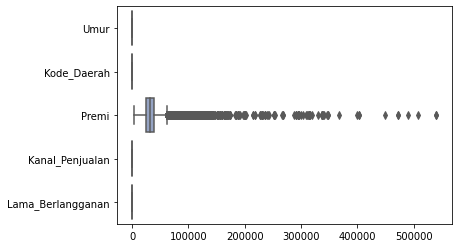

In [ ]:
# Menampilkan boxplot

sns.boxplot(data= data_train, orient="h", palette="Set2")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


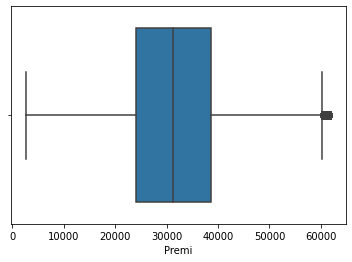

In [ ]:
# Menghilangkan outlier
def outlier(data_train):
  Q1 = data_train.quantile(0.25)
  Q3 = data_train.quantile(0.75)

  IQR = Q3 - Q1
  Lower = Q1 - (1.5 * IQR)
  Upper = Q3 + (1.5 * IQR)

  hasil = data_train[((data_train>Lower) & (data_train<Upper))]

  return hasil

data_train_new = data_train
data_train_new['Premi'] = outlier(data_train['Premi'])

sns.boxplot(data_train_new['Premi'])

In [ ]:
#Mengisi nilai NULL

x = pd.DataFrame(data_train_new)

meanValue = x['Umur'].mean()
data_train_new['Umur'].fillna(value=meanValue, inplace=True)
meanValue = x['Kode_Daerah'].mean()
data_train_new['Kode_Daerah'].fillna(value=meanValue, inplace=True)
meanValue = x['Premi'].mean()
data_train_new['Premi'].fillna(value=meanValue, inplace=True)
meanValue = x['Kanal_Penjualan'].mean()
data_train_new['Kanal_Penjualan'].fillna(value=meanValue, inplace=True)
meanValue = x['Lama_Berlangganan'].mean()
data_train_new['Lama_Berlangganan'].fillna(value=meanValue, inplace=True)

print(data_train_new)
print(data_train_new.isna().sum())
data_train_new

        Umur  Kode_Daerah    Premi  Kanal_Penjualan  Lama_Berlangganan
0       30.0         33.0  28029.0            152.0               97.0
1       48.0         39.0  25800.0             29.0              158.0
2       21.0         46.0  32733.0            160.0              119.0
3       58.0         48.0   2630.0            124.0               63.0
4       50.0         35.0  34857.0             88.0              194.0
...      ...          ...      ...              ...                ...
285826  23.0          4.0  25988.0            152.0              217.0
285827  21.0         46.0  44686.0            152.0               50.0
285828  23.0         50.0  49751.0            152.0              226.0
285829  68.0          7.0  30503.0            124.0              270.0
285830  45.0         28.0  36480.0             26.0               44.0

[285831 rows x 5 columns]
Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype:

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


In [ ]:
# Min Max Scaller
Scaller = MinMaxScaler()
Scaller.fit(data_train_new)
data_train_new = Scaller.transform(data_train_new)
data_train_new = pd.DataFrame(data_train_new, columns=['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'])
data_train_new



,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.428914,0.932099,0.301038
1,0.430769,0.750000,0.391273,0.172840,0.512111
2,0.015385,0.884615,0.508351,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.544219,0.537037,0.636678
...,...,...,...,...,...
285826,0.046154,0.076923,0.394448,0.932099,0.716263
285827,0.015385,0.884615,0.710201,0.932099,0.138408
285828,0.046154,0.961538,0.795734,0.932099,0.747405
285829,0.738462,0.134615,0.470693,0.759259,0.899654


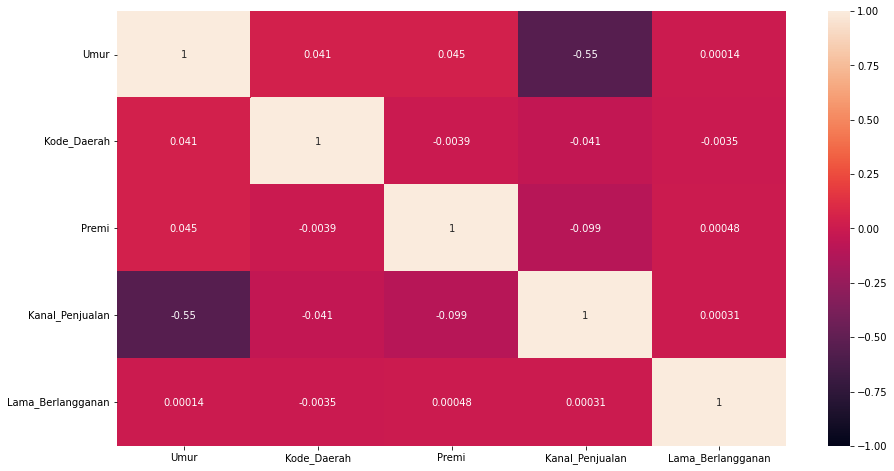

In [ ]:
#HeatMap
plt.figure(figsize=(15,8))
sns.heatmap(data_train_new.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
# Memilih data dan merubah data menjadi array numpy
data_train_new = data_train_new[['Umur', 'Kanal_Penjualan']]
data = data_train_new.to_numpy()
data_train_new


,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.584615,0.759259
4,0.461538,0.537037
...,...,...
285826,0.046154,0.932099
285827,0.015385,0.932099
285828,0.046154,0.932099
285829,0.738462,0.759259


# **PEMODELAN**

In [ ]:
# Perhitungan Jarak Euclidean
def euclidean(x, y):
    hasil = []
    for i in range(len(y)):
      jarak = math.sqrt(math.pow(x[0]-y[i][0],2) + math.pow(x[1]-y[i][1],2))
      hasil.append(jarak)
    return hasil

In [ ]:
#Fungsi unutk menghitung jarak seluruh data
def calculateDistance(arr, x):
    newArr = []
    for i in range(len(arr)):
        newArr.append(euclidean(arr[i], x))
    return newArr

In [ ]:
#Fungsi untuk menghitung rata-rata
def mean(x):
    return sum(x)/len(x)

#Fungsi untuk menghitung rata-rata dari cluster
def ClustAvg(x, k):
    result = []
    arrdat1 = []
    arrdat2 = []
    for i in range(k):
        for j in range(len(x)):
            if x[j][2] == i:
                arrdat1.append(x[j][0])
                arrdat2.append(x[j][1])
        result.append([mean(arrdat1), mean(arrdat2)])
        arrdat1 = []
        arrdat2 = []
    return result

In [ ]:
#Fungsi untuk mencari centroid baru
def NewCentroid(data, cen, k):
    distance = calculateDistance(data, cen)
    cluster = []
    for i in range(len(distance)):
        minimum = min(distance[i])
        index = distance[i].index(minimum)
        cluster.append([data[i][0], data[i][1], index])
    centroid = ClustAvg(cluster, k)
    
    return centroid, cluster

In [ ]:
def Kmeans(data , k):
    # inisialisasi variabel yang akan digunakan
    i = 1
    jarak = []
    centroid = []

    #Memasukan jumlah maksimum iterasi
    iterasi = 50

    #Pencarian centroid secara random
    CentroidRandom = {i: data[random.randint(0, len(data))] for i in range(k)}
  
    #Proses Looping sebanyak iterasi yang dimasukkan
    #Looping ini bekerja untuk terus mencari centroid baru
    #Looping ini akan berhenti ketika nilai centroid sebelumnya sama dengan centroid sekarang
    while i <= iterasi :
        centroid, cluster = NewCentroid(data,CentroidRandom, k)
        print("Iterasi ke", i,":", "Cluster 0", centroid[0], "Cluster 1", centroid[1], "Cluster 2", centroid[2])
        if CentroidRandom == centroid :
            break
        CentroidRandom = centroid
        i += 1

    #Fungsi ini mengembalikan nilai cluster dan centroid
    return cluster, centroid




In [ ]:
k = 3
cluster, centroid= Kmeans(data, k)

Iterasi ke 1 : Cluster 0 [0.07970011160272533, 0.9225937039284946] Cluster 1 [0.33120373591546765, 0.5317906884405522] Cluster 2 [0.6471058000213703, 0.4603955126799889]
Iterasi ke 2 : Cluster 0 [0.11779234383801716, 0.9195929989325803] Cluster 1 [0.341246729649712, 0.5095442282010065] Cluster 2 [0.6310834632398415, 0.3500346290897863]
Iterasi ke 3 : Cluster 0 [0.1339098706434602, 0.9095169822583056] Cluster 1 [0.3814568368477476, 0.5773409085318777] Cluster 2 [0.581980203433936, 0.24353219222226735]
Iterasi ke 4 : Cluster 0 [0.12003792054298335, 0.9154940944693531] Cluster 1 [0.47397718350444334, 0.739339491848915] Cluster 2 [0.4811496424327978, 0.1483710619345149]
Iterasi ke 5 : Cluster 0 [0.10576570244636925, 0.9150010421711013] Cluster 1 [0.4802648739407858, 0.7754273099030874] Cluster 2 [0.4697037808478145, 0.15082271656193338]
Iterasi ke 6 : Cluster 0 [0.10224796326201016, 0.9157943267506102] Cluster 1 [0.47446586225248233, 0.7786547660774359] Cluster 2 [0.46969090433544397, 0.15

# **EVALUASI**

Centroid 0 [0.10160248256696656, 0.9161011172635855]
Centroid 1 [0.47315867554140545, 0.7790065960722511]
Centroid 2 [0.4696918431836914, 0.15086756836483117]


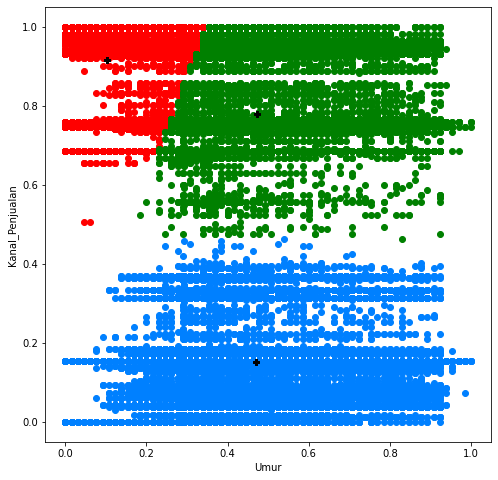

In [ ]:
#Menampilkan jumlah dan letak seluruh centroid
for i in range(k):
    print(f'Centroid', i , centroid[i])

def Visualisasi(cluster, centroid, k):
    plt.subplots(figsize=(8,8))
    plt.xlabel("Umur")
    plt.ylabel("Kanal_Penjualan")

    colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

    for i in range(k):
        clusx = []
        clusy = []
        for j in range(len(cluster)):
            if cluster[j][2] == i:
                clusx.append(cluster[j][0])
                clusy.append(cluster[j][1])
        plt.scatter(clusx , clusy, color = colors[i] )
        plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
    plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

    

Visualisasi(cluster, centroid, k)


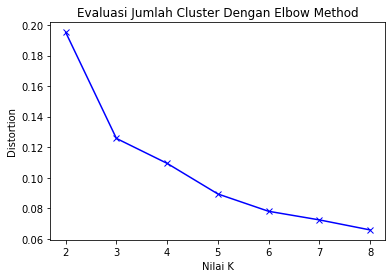

In [ ]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(data_train_new)
    model.fit(data_train_new)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(data_train_new, model.cluster_centers_, 'euclidean'), axis=1)) / data_train_new.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()

